1. Implement convolution operation for a sample image of shape (H=6, W=6, C=1) with a
random kernel of size (3,3) using torch.nn.functional.conv2d.

In [1]:
import torch
import torch.nn.functional as F

torch.manual_seed(42)
image = torch.randn(1, 1, 6, 6)  # (Batch, Channel, Height, Width)

kernel = torch.randn(1, 1, 3, 3)  # (Out Channels, In Channels, Kernel Height, Kernel Width)

output = F.conv2d(image, kernel, stride=1, padding=0)  # Output shape: (1, 1, 4, 4)

print("Input Image:\n", image.squeeze())  # Remove batch & channel dimension
print("\nKernel:\n", kernel.squeeze())  # Remove batch & channel dimension
print("\nOutput Feature Map:\n", output.squeeze())  # Remove batch & channel dimension


Input Image:
 tensor([[ 1.9269,  1.4873,  0.9007, -2.1055,  0.6784, -1.2345],
        [-0.0431, -1.6047, -0.7521,  1.6487, -0.3925, -1.4036],
        [-0.7279, -0.5594, -0.7688,  0.7624,  1.6423, -0.1596],
        [-0.4974,  0.4396,  0.3189, -0.4245,  0.3057, -0.7746],
        [ 0.0349,  0.3211,  1.5736, -0.8455, -1.2742,  2.1228],
        [-1.2347, -0.4879, -1.4181,  0.8963,  0.0499,  2.2667]])

Kernel:
 tensor([[ 0.5227, -0.2384, -0.0499],
        [ 0.5263, -0.0085,  0.7291],
        [ 0.1331,  0.8640, -1.0157]])

Output Feature Map:
 tensor([[ 0.2510, -0.4815, -0.8689,  0.3297],
        [-0.5517,  0.2914, -0.6152,  2.2907],
        [-1.5580,  2.0330,  0.5019, -4.1452],
        [ 1.6366, -2.4863,  0.6940, -1.2825]])


2. Apply torch.nn.Conv2d to the input image of Qn 1 with out-channel=3 and observe the
output. Implement the equivalent of torch.nn.Conv2d using the torch.nn.functional.conv2D
to get the same output. You may ignore bias.

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(42)

image = torch.randn(1, 1, 6, 6)  # (Batch, Channels, Height, Width)

# Define Conv2d with 3 output channels, kernel size 3x3, without bias
conv_layer = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, bias=False)
#print(conv_layer.weight.data)
output1 = conv_layer(image)
kernel_weights = conv_layer.weight.data  # Shape: (3, 1, 3, 3)
output2 = F.conv2d(image, kernel_weights, stride=1, padding=0)  # No bias
is_same = torch.allclose(output1, output2)

# Print results
print("Output from nn.Conv2d:\n", output1.squeeze())
print("Output from nn.Conv2d:\n", output2.squeeze())  # Remove batch dimension
  # Remove batch dimension


Output from nn.Conv2d:
 tensor([[[-0.2437, -0.5943, -1.0155,  0.6063],
         [-0.8823,  0.2304,  0.7604, -0.5837],
         [-0.0988, -0.2039,  1.1443,  0.3428],
         [ 0.0713,  0.3766, -0.6139,  0.1240]],

        [[-0.0820,  0.4518, -1.1252,  0.0527],
         [-0.3694,  0.2397,  0.6688, -0.1575],
         [-0.1804, -0.3421,  0.3218, -0.2668],
         [ 1.1609, -0.1286, -0.1920,  0.1683]],

        [[ 1.7663,  0.2434,  0.4893, -0.8779],
         [ 0.3622,  0.0672, -0.7294, -0.6666],
         [-0.3953, -0.0847, -0.2652,  0.8485],
         [-0.4824, -0.3321,  0.7704, -0.1652]]], grad_fn=<SqueezeBackward0>)
Output from nn.Conv2d:
 tensor([[[-0.2437, -0.5943, -1.0155,  0.6063],
         [-0.8823,  0.2304,  0.7604, -0.5837],
         [-0.0988, -0.2039,  1.1443,  0.3428],
         [ 0.0713,  0.3766, -0.6139,  0.1240]],

        [[-0.0820,  0.4518, -1.1252,  0.0527],
         [-0.3694,  0.2397,  0.6688, -0.1575],
         [-0.1804, -0.3421,  0.3218, -0.2668],
         [ 1.1609, -0.1

3. Implement CNN for classifying digits in MNIST dataset using PyTorch. Display the
classification accuracy in the form of a Confusion matrix. Verify the number of learnable parameters in the model.

Failed to download (trying next):
HTTP Error 404: Not Found

Failed download. Trying https -> http instead. Downloading http://ossci-datasets.s3.amazonaws.com/mnist/train-images-idx3-ubyte.gz to ./data/MNIST/raw/train-images-idx3-ubyte.gz


100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%
/home/mustafa/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:128: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/5], Loss: 0.1692, Accuracy: 94.82%
Epoch [2/5], Loss: 0.0482, Accuracy: 98.56%
Epoch [3/5], Loss: 0.0328, Accuracy: 98.98%
Epoch [4/5], Loss: 0.0248, Accuracy: 99.20%
Epoch [5/5], Loss: 0.0195, Accuracy: 99.36%


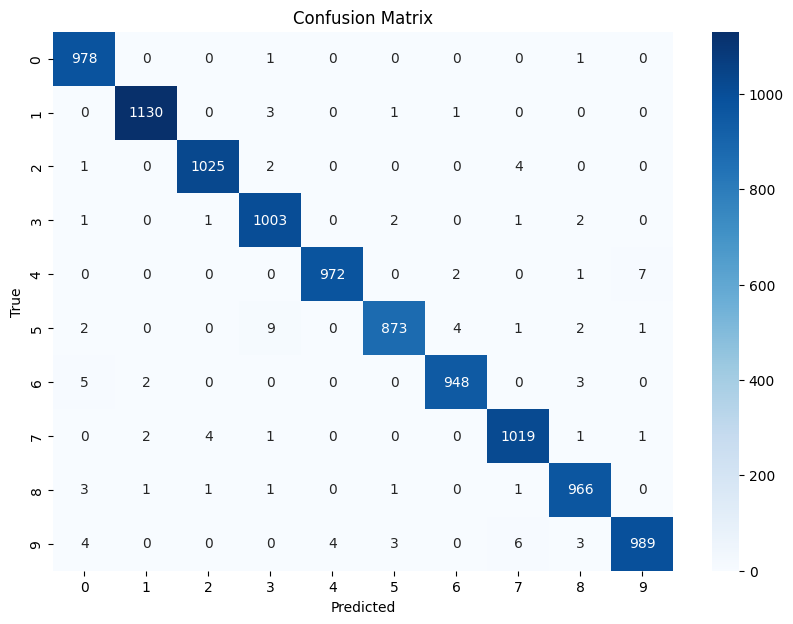

Total number of learnable parameters: 421642


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

torch.manual_seed(42)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)  # Conv layer 1
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)  # Conv layer 2
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # Fully connected layer
        self.fc2 = nn.Linear(128, 10)  # Output layer (10 digits)

    def forward(self, x):
        x = torch.relu(self.conv1(x))  # Activation after conv1
        x = F.max_pool2d(x, 2, 2)  # Pooling layer 1
        x = F.relu(self.conv2(x))  # Activation after conv2
        x = F.max_pool2d(x, 2, 2)  # Pooling layer 2
        x = x.view(-1, 64 * 7 * 7)  # Flatten before FC layers
        x = F.relu(self.fc1(x))
        x = self.fc2(x)  # No softmax (CrossEntropyLoss includes it)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100 * correct/total:.2f}%")

model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# 8️⃣ Compute Learnable Parameters
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total number of learnable parameters: {total_params}")
